## <font size=5> <strong>Analysis about ED
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os
import warnings
import sys
import utils

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, Dropout, Embedding
from keras.losses import CategoricalCrossentropy
from keras.optimizers import SGD, Adam
warnings.filterwarnings('ignore')


## II. Importing and understanding our dataset 

### Load and preprocess datasets

In [2]:
dataset_0102 = utils.preprocess('0102')
print(dataset_0102.describe())
dataset_0304 = utils.preprocess('0304')
print(dataset_0304.describe())

merged_dataset = pd.concat([dataset_0102,dataset_0304],axis=0)
merged_dataset = merged_dataset.reset_index(drop=True)
age_split = utils.spilt_by_age(merged_dataset)
# divided into three parts
low_age_dataset = age_split["low_age_dataset"]
mid_age_dataset = age_split["mid_age_dataset"]
high_age_dataset = age_split["high_age_dataset"]

low_age_weights = low_age_dataset['WTMEC2YR']
low_age_dataset = low_age_dataset.drop(columns=['WTMEC2YR'])

mid_age_weights = mid_age_dataset['WTMEC2YR']
mid_age_dataset = mid_age_dataset.drop(columns=['WTMEC2YR'])

high_age_weights = high_age_dataset['WTMEC2YR']
high_age_dataset = high_age_dataset.drop(columns=['WTMEC2YR'])


     SEQN  DMDMARTL  DMDEDUC  RIAGENDR  RIDAGEEX  RIDRETH1      WTMEC2YR  \
0  9966.0       3.0      3.0       1.0     473.0       3.0  91352.991726   
1  9967.0       5.0      3.0       1.0     284.0       4.0  29456.680208   
2  9968.0       2.0      1.0       2.0    1012.0       3.0  27508.137821   
3  9969.0       1.0      3.0       2.0     612.0       3.0  78536.315892   
4  9970.0       5.0      1.0       1.0     200.0       2.0  34059.984716   

   SSTESTO  PAD320  PAD480  BMXBMI  SMQ020  ALQ101  DIQ010  BPQ040A  BPQ090D  \
0     4.38     1.0     2.0   30.22     1.0     1.0     2.0      NaN      2.0   
1      NaN     2.0     0.0   29.98     2.0     1.0     2.0      NaN      NaN   
2      NaN     2.0     2.0   24.62     1.0     1.0     2.0      1.0      NaN   
3      NaN     2.0     2.0   22.26     2.0     1.0     2.0      NaN      NaN   
4      NaN     1.0     3.0   39.23     NaN     NaN     2.0      NaN      NaN   

   MCQ220  
0     2.0  
1     2.0  
2     2.0  
3     2.0  
4 

## Exploratory Data Analysis (EDA)

### Analysis relationship between KIQ400 and ARIDAGEEX - factors

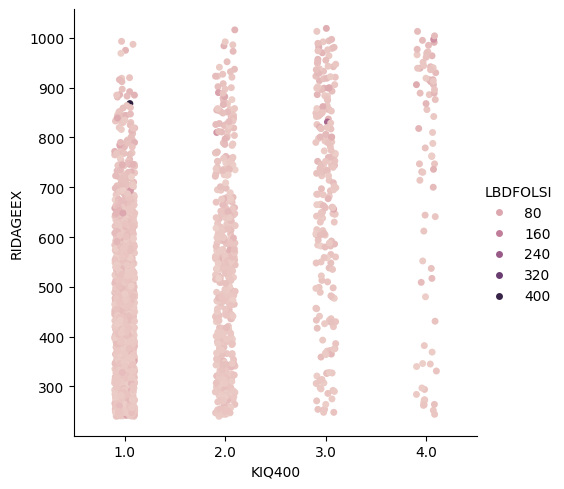

In [115]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDFOLSI')

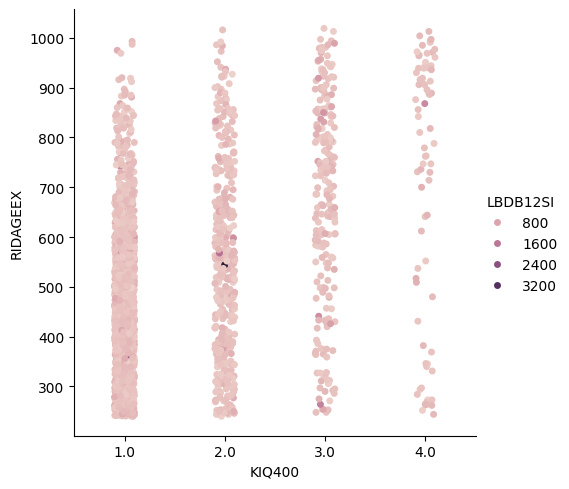

In [116]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDB12SI')

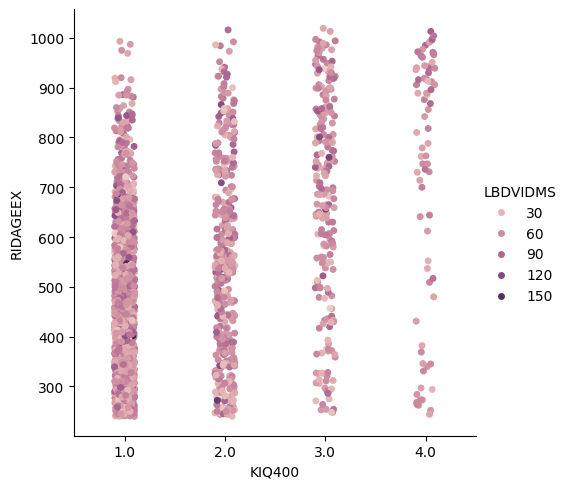

In [117]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDVIDMS')

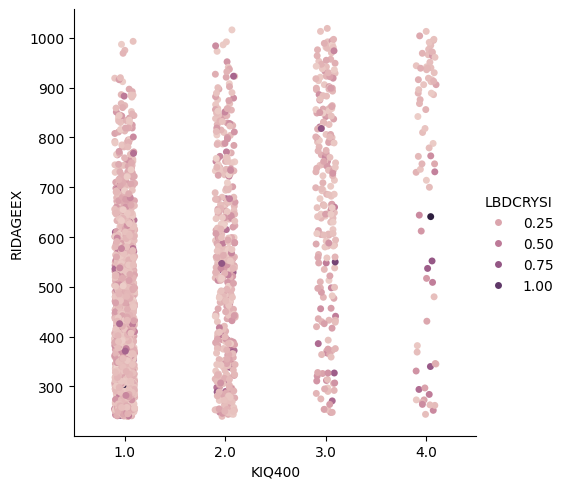

In [118]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDCRYSI')

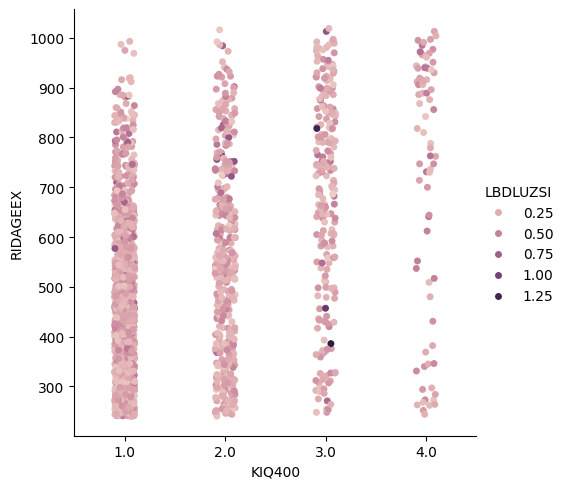

In [119]:
sns.catplot(x='KIQ400',y='RIDAGEEX',data=merged_dataset,kind='strip',hue='LBDLUZSI')

### Analysing the target variable:

In [123]:
print(low_age_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = low_age_dataset['KIQ400'].value_counts().sort_index()

# sns.barplot(x=value_counts.index, y=value_counts.values, orient='h')


KIQ400      1.000000
RIDRETH1    0.143703
LBDCRYSI    0.122113
PAD480      0.102016
PAD320      0.100648
LBDVIDMS    0.098501
SMQ020      0.083328
LBDFOLSI    0.078888
LBDLUZSI    0.071333
ALQ101      0.049330
RIDAGEEX    0.036073
LBDB12SI    0.023963
BMXBMI      0.011573
Name: KIQ400, dtype: float64


In [125]:
print(mid_age_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = mid_age_dataset['KIQ400'].value_counts().sort_index()

# sns.barplot(x=value_counts.index, y=value_counts.values, orient='h')

KIQ400      1.000000
RIDAGEEX    0.175139
PAD320      0.121621
SMQ020      0.103368
LBDVIDMS    0.063835
LBDB12SI    0.045743
LBDFOLSI    0.045075
ALQ101      0.044609
RIDRETH1    0.035267
PAD480      0.031840
LBDCRYSI    0.030917
BMXBMI      0.021929
LBDLUZSI    0.019687
Name: KIQ400, dtype: float64


In [126]:
print(high_age_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = high_age_dataset['KIQ400'].value_counts().sort_index()

# sns.barplot(x=value_counts.index, y=value_counts.values, orient='h')

KIQ400      1.000000
RIDAGEEX    0.350217
PAD320      0.106557
PAD480      0.089455
RIDRETH1    0.066034
SMQ020      0.055282
ALQ101      0.054232
LBDCRYSI    0.052448
LBDVIDMS    0.036910
LBDLUZSI    0.034051
LBDB12SI    0.030307
BMXBMI      0.014166
LBDFOLSI    0.001799
Name: KIQ400, dtype: float64


In [129]:
print(merged_dataset.corr()['KIQ400'].abs().sort_values(ascending=False))

value_counts = merged_dataset['KIQ400'].value_counts().sort_index()

KIQ400      1.000000
RIDAGEEX    0.418980
WTMEC2YR    0.239784
PAD320      0.136455
SMQ020      0.133106
PAD480      0.105632
RIDRETH1    0.098514
LBDFOLSI    0.077355
LBDLUZSI    0.056895
LBDCRYSI    0.034179
LBDVIDMS    0.033434
ALQ101      0.017958
BMXBMI      0.009716
LBDB12SI    0.003807
Name: KIQ400, dtype: float64


### Analysing the all features

#### Low age

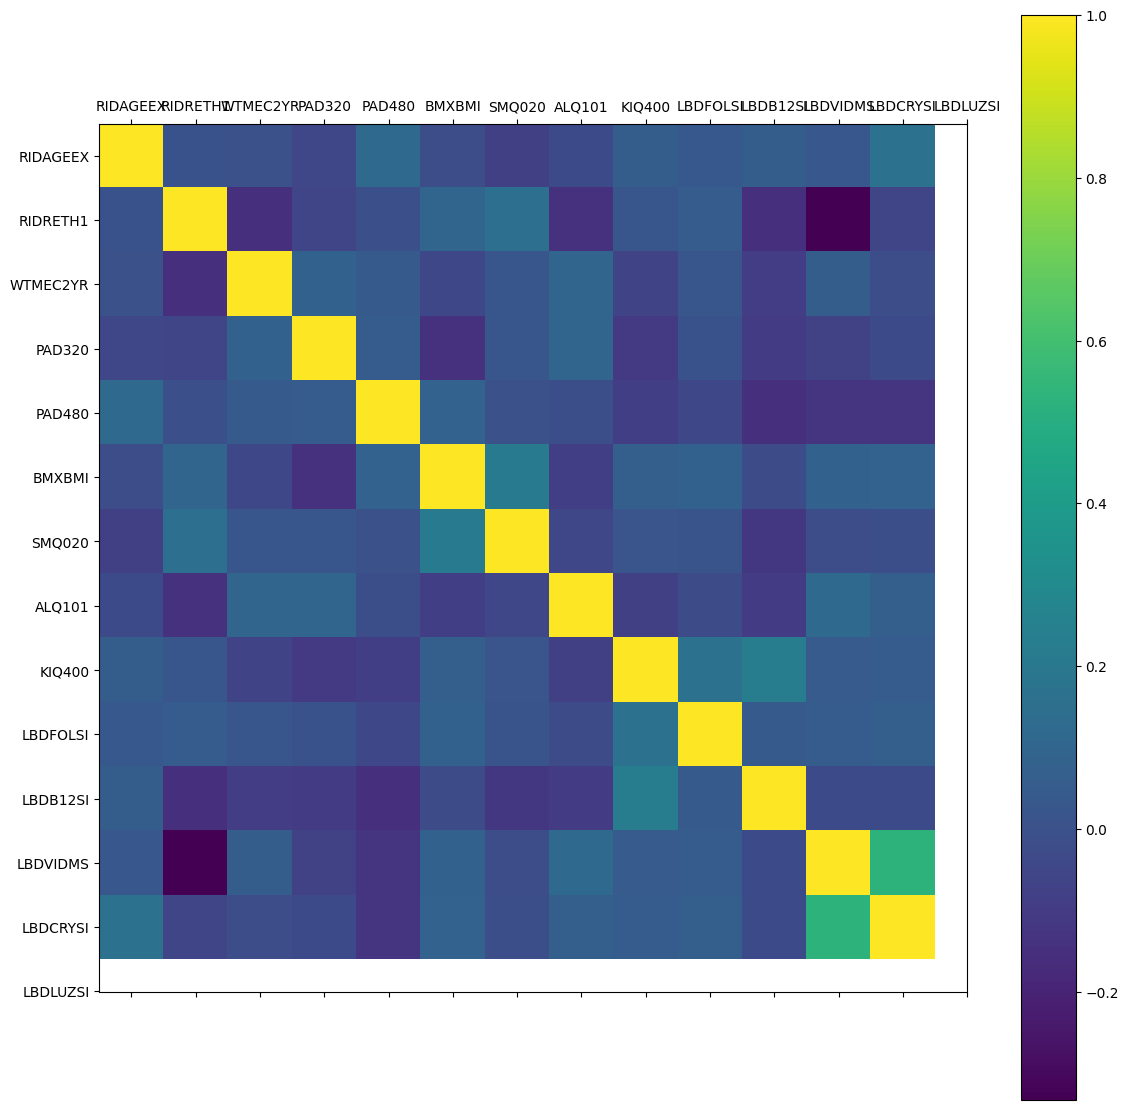

In [6]:
rcParams['figure.figsize'] = 16, 14
plt.matshow(low_age_dataset.corr())
plt.yticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.xticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.colorbar()
plt.show()

#### Mid age

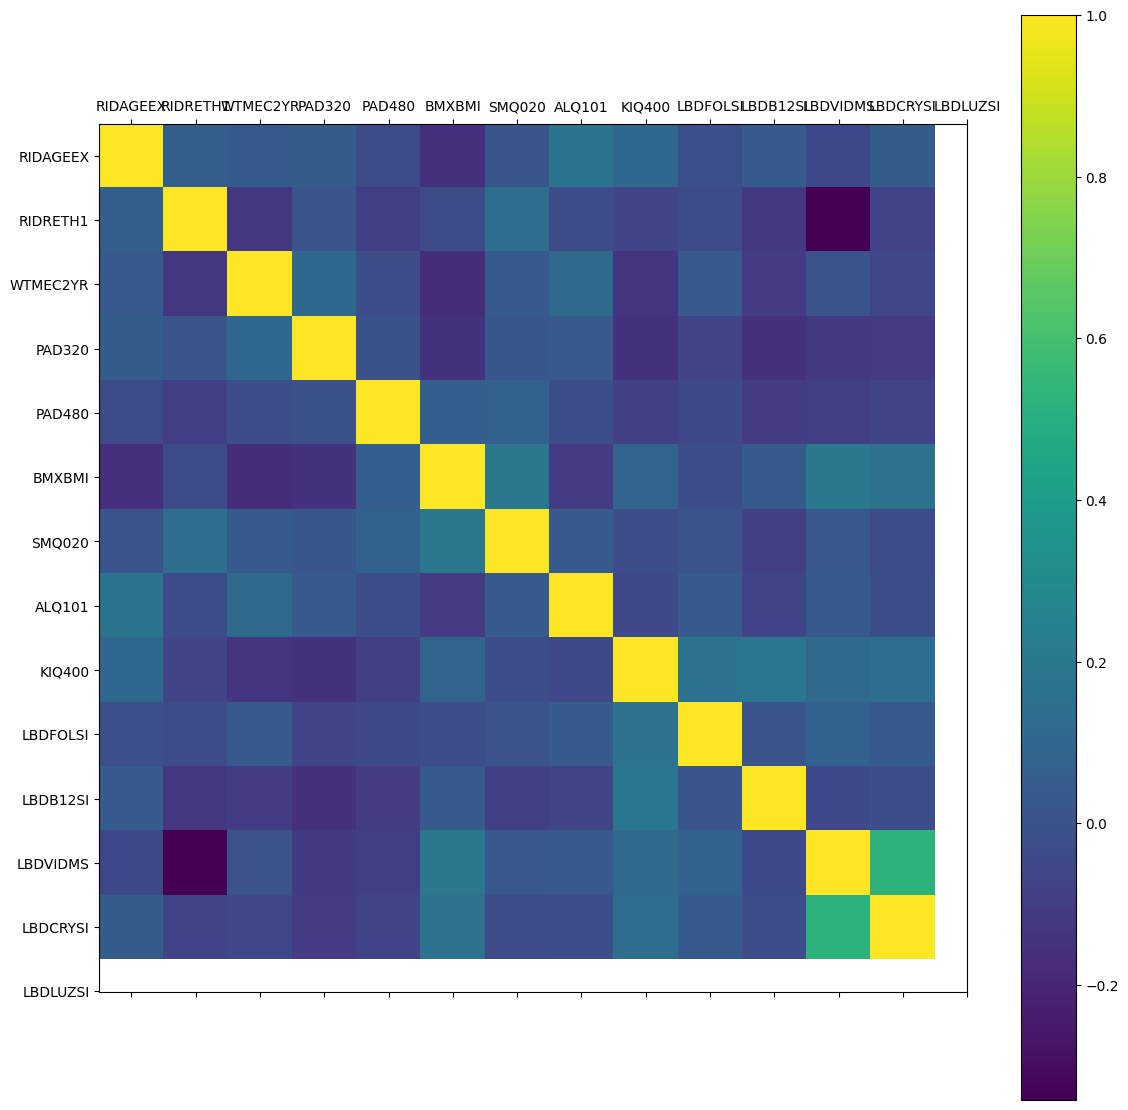

In [7]:
rcParams['figure.figsize'] = 16, 14
plt.matshow(mid_age_dataset.corr())
plt.yticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.xticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.colorbar()
plt.show()

#### High age

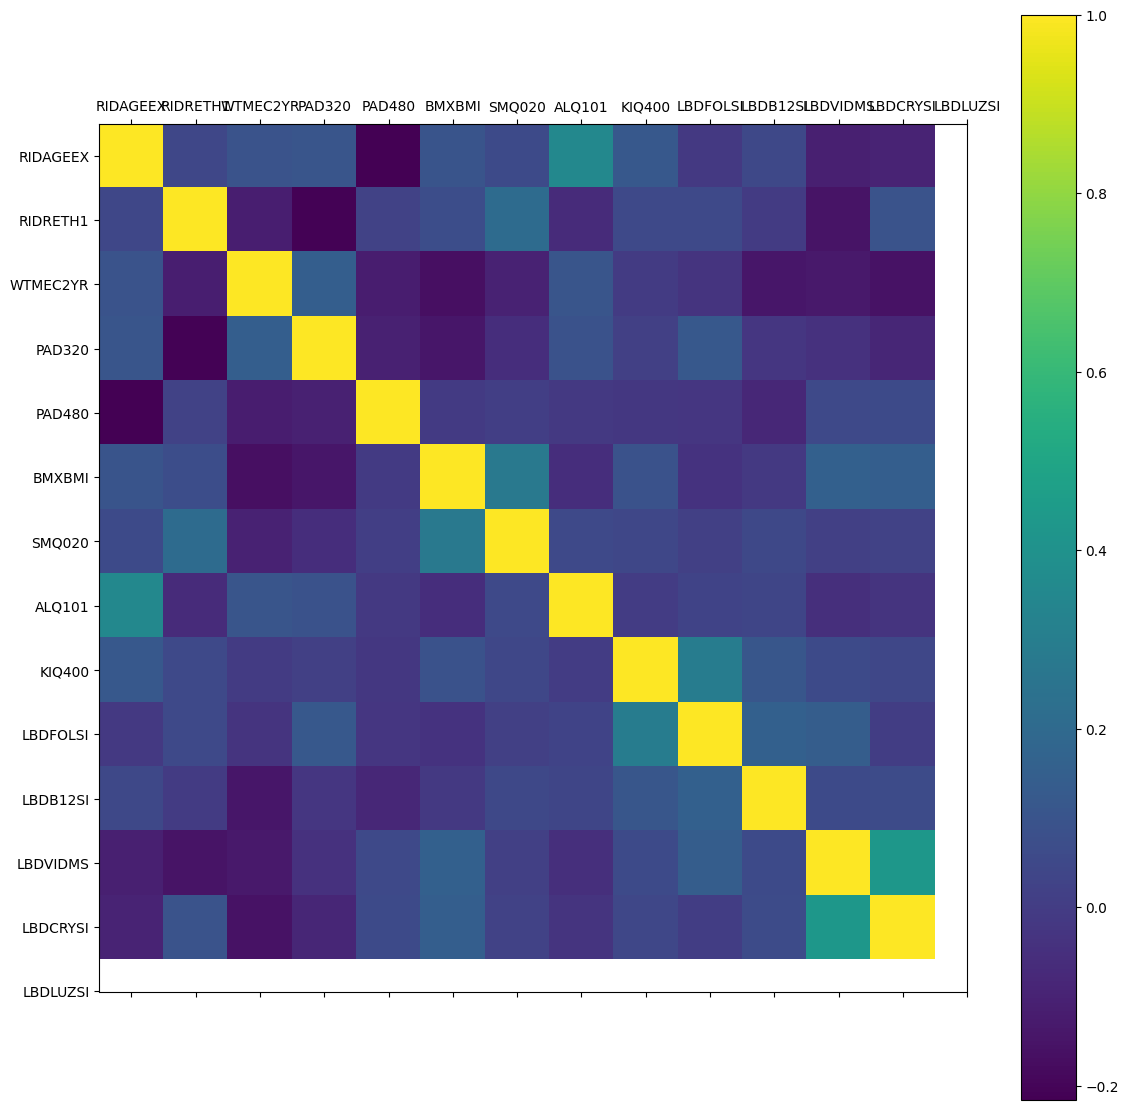

In [9]:
rcParams['figure.figsize'] = 16, 14
plt.matshow(high_age_dataset.corr())
plt.yticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.xticks(np.arange(merged_dataset.shape[1]), merged_dataset.columns)
plt.colorbar()
plt.show()

## IV. Train Test split

#### Low age

In [11]:
# predictors = merged_dataset.drop("KIQ400", axis=1)
# normalization
# for col in predictors.columns:
#     predictors[col] = (predictors[col] - predictors[col].min()) / (predictors[col].max() - predictors[col].min())

# print(predictors)
predictors_low_age = low_age_dataset.drop("KIQ400",axis=1)
target_low_age = low_age_dataset["KIQ400"]

X_train_la, X_test_la, Y_train_la, Y_test_la,weight_train_la,weight_test_la = train_test_split(predictors_low_age, target_low_age, low_age_weights,test_size=0.20, random_state=32)

scaler = StandardScaler()
X_train_la = scaler.fit_transform(X_train_la)
X_test_la = scaler.transform(X_test_la)
print(X_train_la.shape, X_test_la.shape, Y_train_la.shape, Y_test_la.shape,weight_train_la.shape,weight_test_la.shape)

(928, 12) (233, 12) (928,) (233,) (928,) (233,)


#### Mid age

In [12]:
predictors_mid_age = mid_age_dataset.drop("KIQ400",axis=1)
target_mid_age = mid_age_dataset["KIQ400"]

X_train_md, X_test_md, Y_train_md, Y_test_md,weight_train_md,weight_test_md = train_test_split(predictors_mid_age, target_mid_age, mid_age_weights,test_size=0.20, random_state=32)

scaler = StandardScaler()
X_train_md = scaler.fit_transform(X_train_md)
X_test_md = scaler.transform(X_test_md)
print(X_train_md.shape, X_test_md.shape, Y_train_md.shape, Y_test_md.shape,weight_train_md.shape,weight_test_md.shape)

(610, 12) (153, 12) (610,) (153,) (610,) (153,)


#### High age

In [13]:
predictors_high_age = high_age_dataset.drop("KIQ400",axis=1)
target_high_age = high_age_dataset["KIQ400"]

X_train_hd, X_test_hd, Y_train_hd, Y_test_hd,weight_train_hd,weight_test_hd = train_test_split(predictors_high_age, target_high_age, high_age_weights,test_size=0.20, random_state=32)

scaler = StandardScaler()
X_train_hd = scaler.fit_transform(X_train_hd)
X_test_hd = scaler.transform(X_test_hd)
print(X_train_hd.shape, X_test_hd.shape, Y_train_hd.shape, Y_test_hd.shape,weight_train_hd.shape,weight_test_hd.shape)

(266, 12) (67, 12) (266,) (67,) (266,) (67,)


## V. Model Fitting

### Logistic Regression

#### Low age

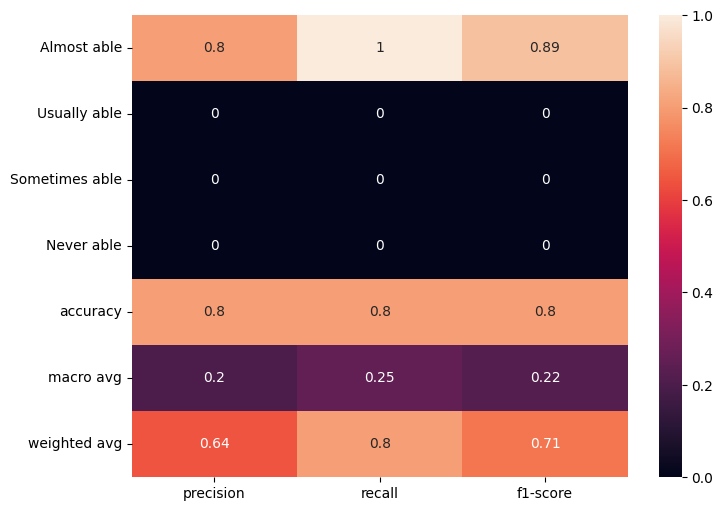

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

target_names = ['Almost able','Usually able','Sometimes able','Never able']

lr = LogisticRegression()

lr.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)

Y_pred_lr = lr.predict(X_test_la)
#plt.scatter(X_train, Y_train, c='grey', edgecolor='black')

lr_report = classification_report(Y_test_la,Y_pred_lr,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True)
plt.show()

In [15]:
Y_pred_lr.shape

(233,)

In [17]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test_la)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 80.26 %


#### Mid age

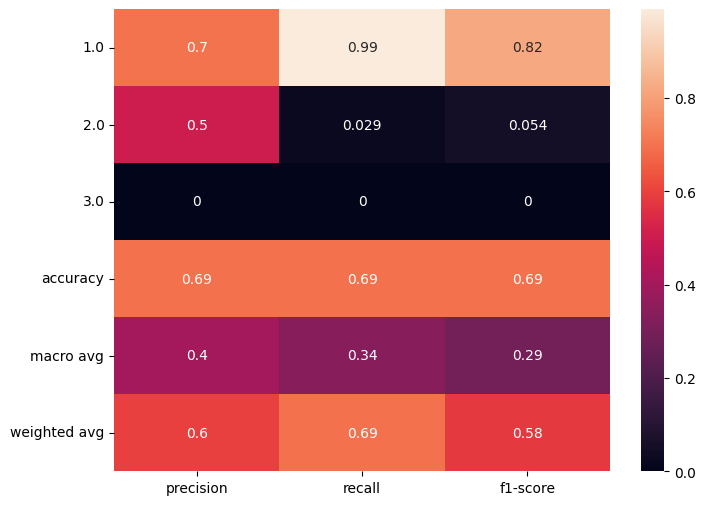

In [31]:
target_names = ['Almost able','Usually able','Sometimes able','Never able']

lr = LogisticRegression()

lr.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)

Y_pred_lr = lr.predict(X_test_md)
#plt.scatter(X_train, Y_train, c='grey', edgecolor='black')

lr_report = classification_report(Y_test_md,Y_pred_lr,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True)
plt.show()

In [30]:
Y_pred_lr.shape

(153,)

In [27]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test_md)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 69.28 %


#### High age

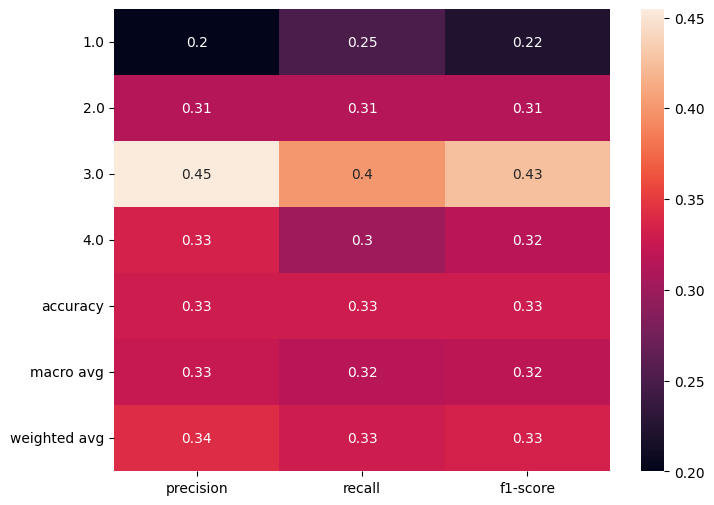

In [33]:
target_names = ['Almost able','Usually able','Sometimes able','Never able']

lr = LogisticRegression()

lr.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)

Y_pred_lr = lr.predict(X_test_hd)
#plt.scatter(X_train, Y_train, c='grey', edgecolor='black')

lr_report = classification_report(Y_test_hd,Y_pred_lr,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True)
plt.show()

In [34]:
Y_pred_lr.shape

(67,)

In [36]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test_hd)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 32.84 %


### Naive Bayes

#### Low age

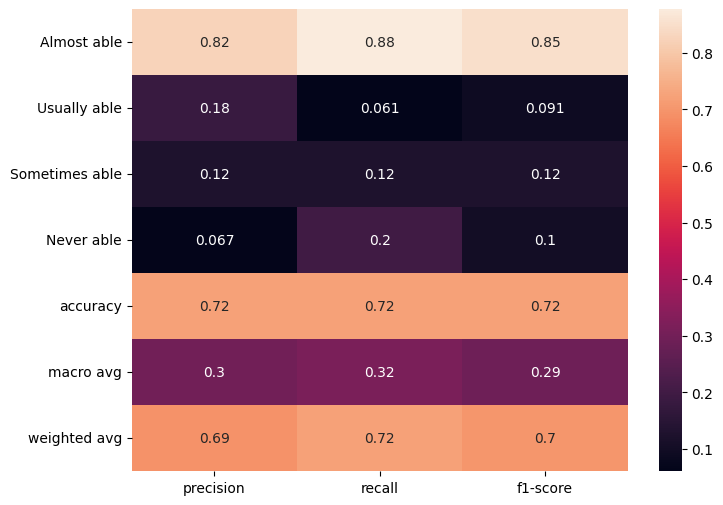

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)

Y_pred_nb = nb.predict(X_test_la)

nb_report = classification_report(Y_test_la,Y_pred_nb,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(nb_report).iloc[:-1, :].T, annot=True)
plt.show()

In [38]:
Y_pred_nb.shape

(233,)

In [39]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test_la)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 72.1 %


#### Mid age

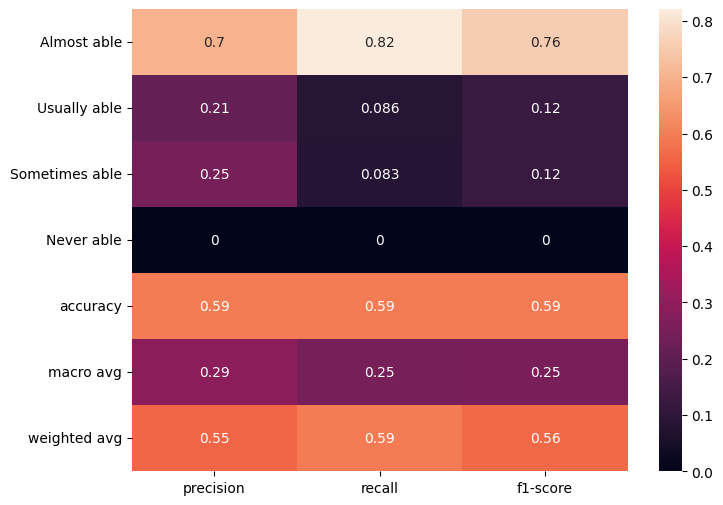

In [42]:
nb = GaussianNB()

nb.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)

Y_pred_nb = nb.predict(X_test_md)

nb_report = classification_report(Y_test_md,Y_pred_nb,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(nb_report).iloc[:-1, :].T, annot=True)
plt.show()

In [43]:
Y_pred_nb.shape

(153,)

In [44]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test_md)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 59.48 %


#### High age

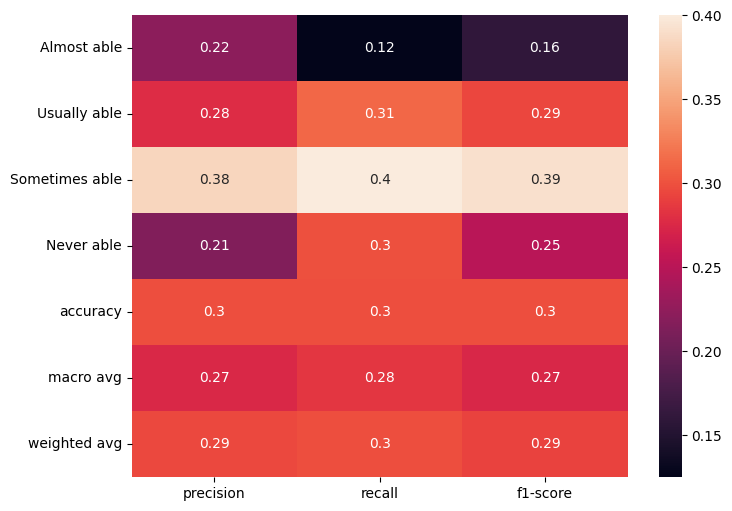

In [45]:
nb = GaussianNB()

nb.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)

Y_pred_nb = nb.predict(X_test_hd)

nb_report = classification_report(Y_test_hd,Y_pred_nb,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(nb_report).iloc[:-1, :].T, annot=True)
plt.show()

In [46]:
Y_pred_nb.shape

(67,)

In [48]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test_hd)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 29.85 %


### SVM

#### Low age

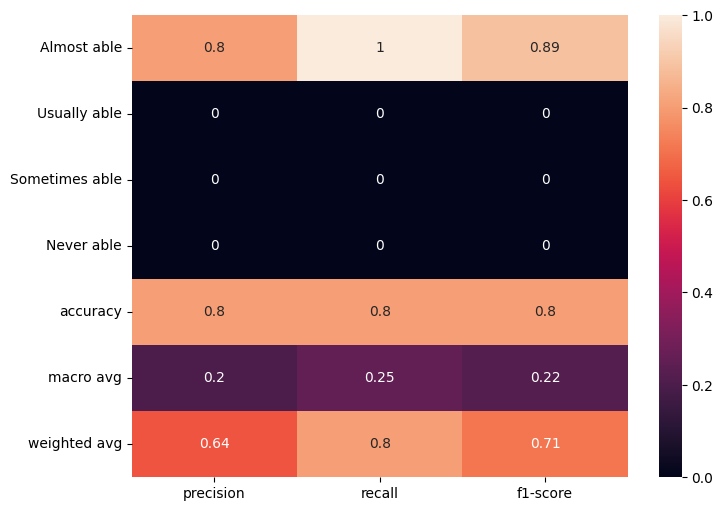

In [49]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train_la, Y_train_la)

Y_pred_svm = sv.predict(X_test_la)

svm_report = classification_report(Y_test_la,Y_pred_svm,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True)
plt.show()

In [50]:
Y_pred_svm.shape

(233,)

In [52]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test_la)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.26 %


#### Mid age

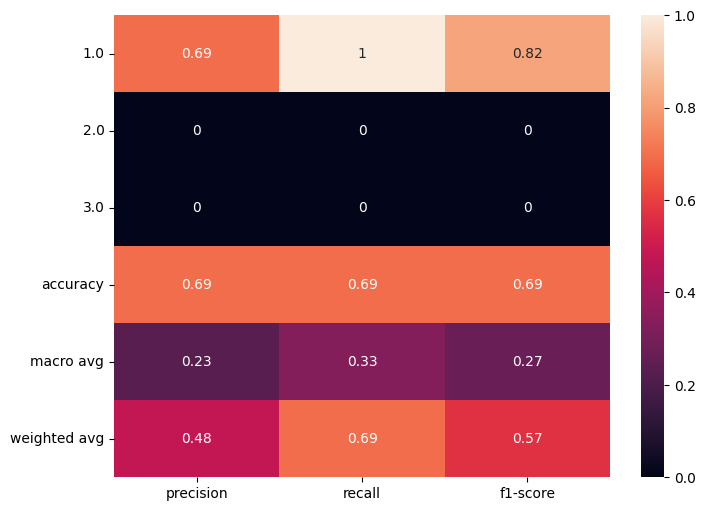

In [54]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train_md, Y_train_md)

Y_pred_svm = sv.predict(X_test_md)

svm_report = classification_report(Y_test_md,Y_pred_svm,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True)
plt.show()

In [55]:
Y_pred_svm.shape

(153,)

In [57]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test_md)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 69.28 %


#### High age

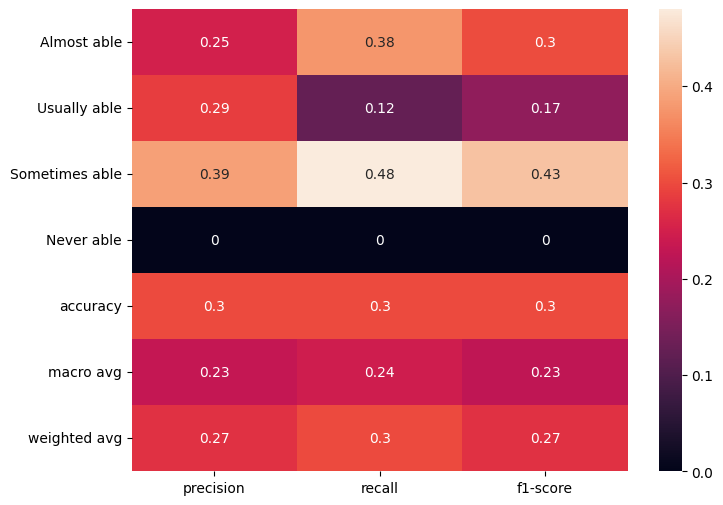

In [60]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train_hd, Y_train_hd)

Y_pred_svm = sv.predict(X_test_hd)

svm_report = classification_report(Y_test_hd,Y_pred_svm,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True)
plt.show()

In [61]:
Y_pred_svm.shape

(67,)

In [63]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test_hd)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 29.85 %


### K Nearest Neighbors

#### Low age

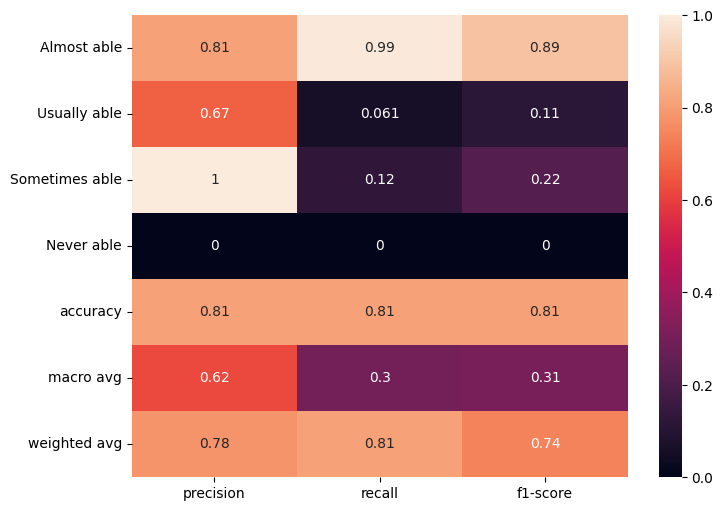

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_la,Y_train_la)
Y_pred_knn=knn.predict(X_test_la)

knn_report = classification_report(Y_test_la,Y_pred_knn,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)
plt.show()

In [65]:
Y_pred_knn.shape

(233,)

In [67]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test_la)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 81.12 %


#### Mid age

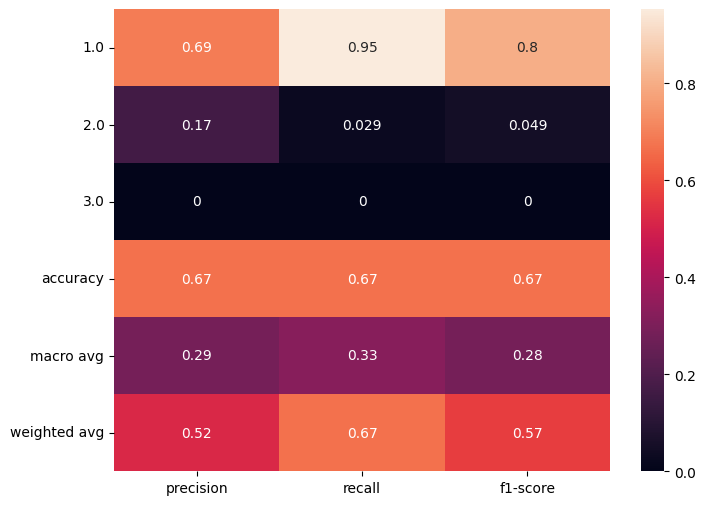

In [69]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_md,Y_train_md)
Y_pred_knn=knn.predict(X_test_md)

knn_report = classification_report(Y_test_md,Y_pred_knn,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)
plt.show()

In [70]:
Y_pred_knn.shape

(153,)

In [71]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test_md)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 66.67 %


#### High age

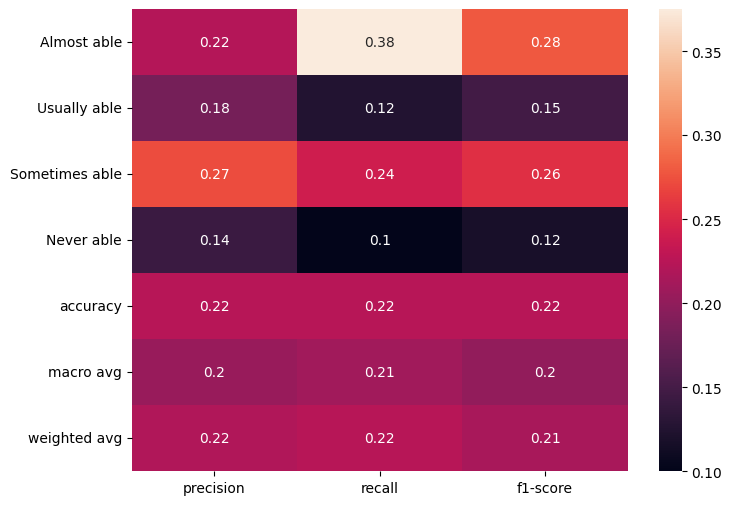

In [72]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_hd,Y_train_hd)
Y_pred_knn=knn.predict(X_test_hd)

knn_report = classification_report(Y_test_hd,Y_pred_knn,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)
plt.show()

In [73]:
Y_pred_knn.shape

(67,)

In [74]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test_hd)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 22.39 %


### Decision Tree

#### Low age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 67.38
best x: 988


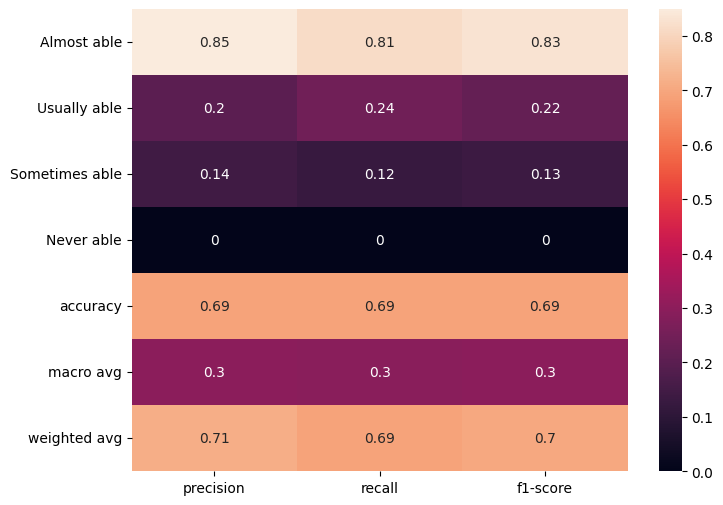

In [75]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)
    Y_pred_dt = dt.predict(X_test_la)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test_la)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_la,Y_train_la)
Y_pred_dt = dt.predict(X_test_la)

dt_report = classification_report(Y_test_la,Y_pred_dt,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True)
plt.show()

In [76]:
print(Y_pred_dt.shape)

(233,)


In [77]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test_la)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 69.1 %


#### Mid age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 60.78
best x: 752


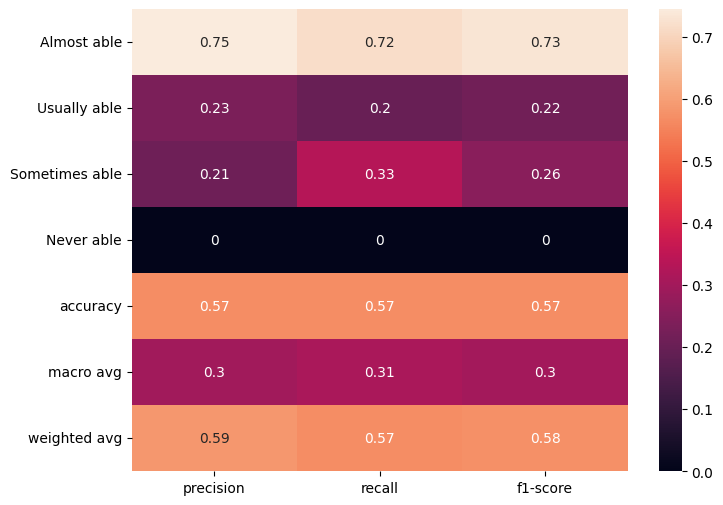

In [78]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)
    Y_pred_dt = dt.predict(X_test_md)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test_md)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_md,Y_train_md)
Y_pred_dt = dt.predict(X_test_md)

dt_report = classification_report(Y_test_md,Y_pred_dt,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True)
plt.show()

In [79]:
print(Y_pred_dt.shape)

(153,)


In [80]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test_md)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 56.86 %


#### High age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 31.34
best x: 138


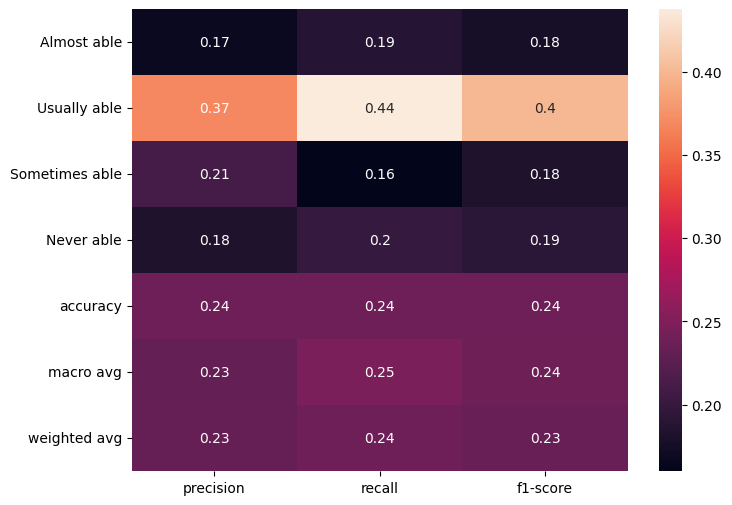

In [81]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)
    Y_pred_dt = dt.predict(X_test_hd)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test_hd)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_hd,Y_train_hd)
Y_pred_dt = dt.predict(X_test_hd)

dt_report = classification_report(Y_test_hd,Y_pred_dt,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(dt_report).iloc[:-1, :].T, annot=True)
plt.show()

In [82]:
print(Y_pred_dt.shape)

(67,)


In [83]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test_hd)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 23.88 %


### Random Forest

#### Low age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 81.12
best x: 69


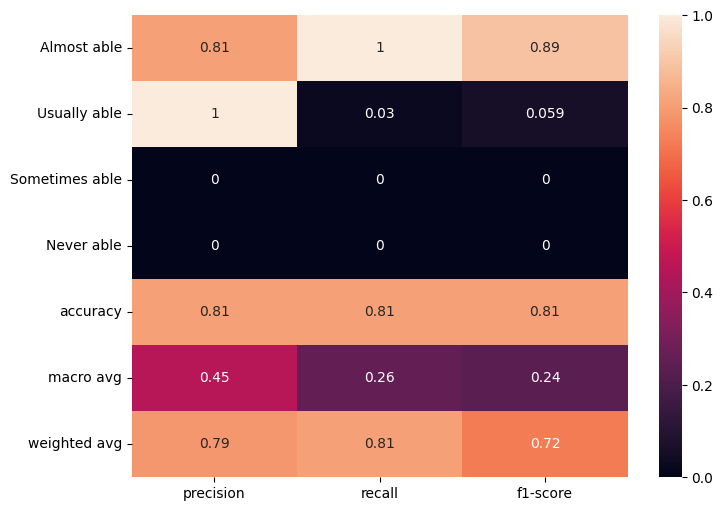

In [84]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    rf = RandomForestClassifier(random_state=x,n_jobs=-1)
    rf.fit(X_train_la,Y_train_la,sample_weight=weight_train_la)
    Y_pred_rf = rf.predict(X_test_la)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test_la)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_la,Y_train_la)
Y_pred_rf = rf.predict(X_test_la)

rf_report = classification_report(Y_test_la,Y_pred_rf,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [85]:
Y_pred_rf.shape

(233,)

In [86]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test_la)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 80.69 %


#### Mid age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 71.24
best x: 75


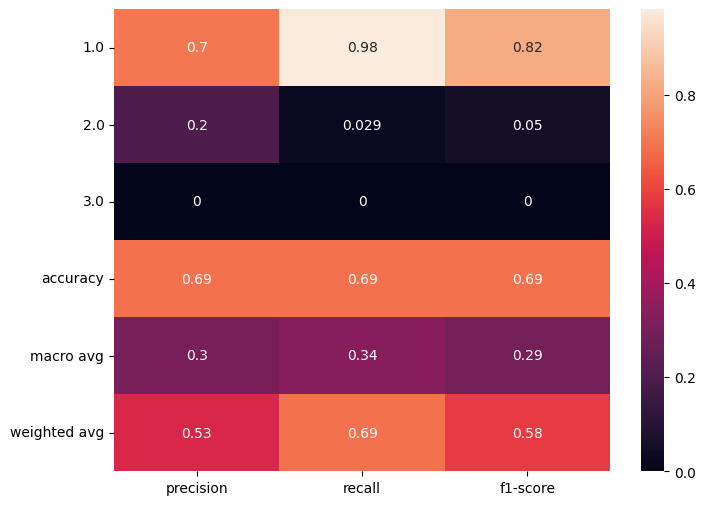

In [89]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    rf = RandomForestClassifier(random_state=x,n_jobs=-1)
    rf.fit(X_train_md,Y_train_md,sample_weight=weight_train_md)
    Y_pred_rf = rf.predict(X_test_md)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test_md)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_md,Y_train_md)
Y_pred_rf = rf.predict(X_test_md)

rf_report = classification_report(Y_test_md,Y_pred_rf,output_dict=True)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [90]:
Y_pred_rf.shape

(153,)

In [91]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test_md)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 68.63 %


#### High age

Progress:[▉▉▉▉▉▉▉▉▉▉] 100.0%

max accuracy: 31.34
best x: 197


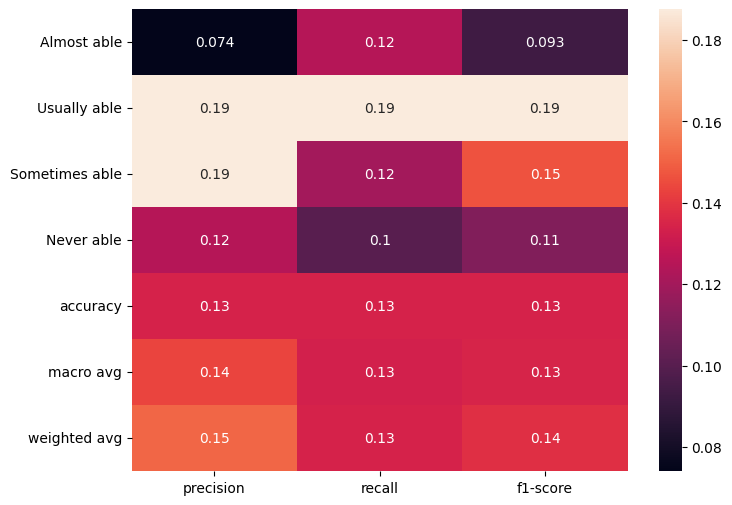

In [92]:
max_accuracy = 0


for x in range(1000):
    utils.show_progress(1000,x+1)
    rf = RandomForestClassifier(random_state=x,n_jobs=-1)
    rf.fit(X_train_hd,Y_train_hd,sample_weight=weight_train_hd)
    Y_pred_rf = rf.predict(X_test_hd)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test_hd)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print('\n')
print('max accuracy:',max_accuracy)
print('best x:',best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_hd,Y_train_hd)
Y_pred_rf = rf.predict(X_test_hd)

rf_report = classification_report(Y_test_hd,Y_pred_rf,output_dict=True,target_names=target_names)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [93]:
Y_pred_rf.shape

(67,)

In [94]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test_hd)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 13.43 %


## VI. Output final score

In [127]:
# scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
# algorithms = ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest"]    

# for i in range(len(algorithms)):
#     print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [128]:
# sns.set(rc={'figure.figsize':(15,8)})
# plt.xlabel("Algorithms")
# plt.ylabel("Accuracy score")

# sns.barplot(x=algorithms,y=scores)